In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/military-expenditure-of-countries-19602019/Military Expenditure.csv


### Loading dataset

In [2]:
df = pd.read_csv(r'/kaggle/input/military-expenditure-of-countries-19602019/Military Expenditure.csv')
df.head()

,Name,Code,Type,Indicator Name,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,2.518695e+08,2.981469e+08,3.258070e+08,2.385834e+08,2.171941e+08,2.682271e+08,1.995186e+08,1.858783e+08,1.914071e+08,1.980863e+08
2,Angola,AGO,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,3.311193e+09,3.500795e+09,3.639496e+09,4.144635e+09,6.090752e+09,6.841864e+09,3.608299e+09,2.764055e+09,3.062873e+09,1.983614e+09
3,Albania,ALB,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,1.827369e+08,1.858932e+08,1.970068e+08,1.832047e+08,1.800155e+08,1.781204e+08,1.323507e+08,1.308532e+08,1.443827e+08,1.804887e+08
4,Andorra,AND,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Drop cols including irrelevant info

In [3]:
df = df.drop(['Indicator Name'], axis=1)
df.tail()

,Name,Code,Type,1960,1961,1962,1963,1964,1965,1966,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
259,Kosovo,XKX,Country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.722709e+07,3.857812e+07,5.096886e+07,4.339040e+07,4.859768e+07,5.357579e+07,4.998416e+07,5.193762e+07,5.726263e+07,6.334407e+07
260,"Yemen, Rep.",YEM,Country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.420775e+09,1.448153e+09,1.612254e+09,1.618840e+09,1.648751e+09,1.714831e+09,NaN,NaN,NaN,NaN
261,South Africa,ZAF,Country,69999972.0,113749954.5,186199925.5,188999924.4,271599891.4,289449884.2,324449870.2,...,3.592688e+09,4.188168e+09,4.594154e+09,4.489590e+09,4.118208e+09,3.892469e+09,3.488868e+09,3.169756e+09,3.638937e+09,3.639879e+09
262,Zambia,ZMB,Country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.209623e+08,2.801878e+08,3.091138e+08,3.463014e+08,3.813458e+08,4.436044e+08,3.724476e+08,2.995048e+08,3.396645e+08,3.780254e+08
263,Zimbabwe,ZWE,Country,NaN,NaN,NaN,NaN,NaN,15600000.0,16950000.0,...,NaN,9.829300e+07,1.984380e+08,3.182720e+08,3.567000e+08,3.681000e+08,3.766770e+08,3.580650e+08,3.405220e+08,4.203640e+08


One of the instances in the dataset contained the Military Expenditure date for the entire planet combined. We can extract that as a seperate series and then plot a portion of it whixh starts from the year 1990

In [9]:
World = df[df['Name'] == 'World']
World = World.drop(['Code', 'Type'], axis=1)
World = World.set_index('Name')
World.index = World.index.rename('Year')
World = World.T
World = World[30:]
World.head()

Year,World
1990,7.000000e+11
1991,6.850000e+11
1992,7.170000e+11
1993,6.860000e+11
1994,6.950000e+11


### Make a plot (Title: Annual Global Military Spending, x-axis: Year, y-axis: Billion US)

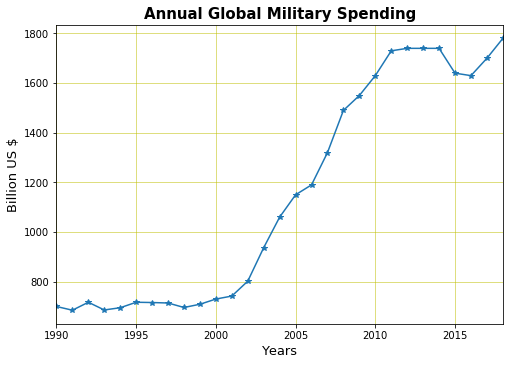

In [21]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

World_value = World['World'] / 1e9
plt.figure(figsize=(8, 5.5), linewidth=1)
World_value.plot(linestyle='-', marker='*')

plt.title('Annual Global Military Spending', fontsize=15, fontweight='bold')
plt.xlabel('Years', fontsize=13)
plt.ylabel('Billion US $', fontsize=13)
plt.grid(color='y', linestyle='-', linewidth='0.5')

### Filter out the data only belonging to countries

In [27]:
Country = df[df['Type'] == 'Country']
Country = Country.drop(['Code', 'Type'], axis=1)
Country = Country.set_index('Name')
Country.index = Country.index.rename('Year')
Country = Country.dropna(axis=0, how='all')
Country = Country.T
Country = Country[30:]

Country.head()

Year,Afghanistan,Angola,Albania,United Arab Emirates,Argentina,Armenia,Australia,Austria,Azerbaijan,Burundi,...,Uruguay,United States,Uzbekistan,Venezuela,Vietnam,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1990,NaN,1.751153e+09,NaN,NaN,2.050908e+09,NaN,6.704214e+09,1.972702e+09,NaN,39602347.38,...,328351062.0,3.060000e+11,NaN,7.378705e+08,511970136.4,NaN,8.070707e+08,4.364458e+09,1.393240e+08,416300000.0
1991,NaN,1.031248e+09,NaN,NaN,2.858779e+09,NaN,7.023509e+09,1.994056e+09,NaN,42751758.83,...,268628014.6,2.800000e+11,NaN,9.837220e+08,427617814.1,NaN,1.028218e+09,3.874415e+09,8.624731e+07,376050000.0
1992,NaN,7.941388e+08,31559657.48,NaN,3.254455e+09,NaN,6.882092e+09,2.139925e+09,11070110.70,38986476.43,...,366965197.8,3.050000e+11,NaN,9.929325e+08,332970309.4,NaN,1.306900e+09,3.677406e+09,9.775628e+07,296350000.0
1993,NaN,1.774398e+09,39289843.43,NaN,3.368550e+09,9829763.866,6.733829e+09,2.115115e+09,77519379.84,36267402.59,...,418919639.0,2.980000e+11,NaN,1.287955e+09,297716380.0,NaN,1.535458e+09,3.254313e+09,5.112829e+07,249800000.0
1994,NaN,5.949912e+08,49649504.93,NaN,3.754725e+09,NaN,7.459697e+09,2.227561e+09,43942747.06,41909745.03,...,450443306.0,2.880000e+11,86929824.56,9.396832e+08,431345012.2,NaN,2.353269e+09,3.478582e+09,6.286947e+07,247900000.0


### Sort and select after filtering for the year 2018 to see the top 10 spenders

In [37]:
top10 = pd.DataFrame((Country.T['2018']).sort_values(ascending=False)[:10])
top10 = top10/1e9
top10.index = top10.index.rename('Country')
top10 = top10.rename(columns={'2018':'Billion $'})
top10.head()

,Billion $
Country,
United States,649.000000
China,250.000000
Saudi Arabia,67.554667
India,66.510289
France,63.799677


### Make a bar chart of the above

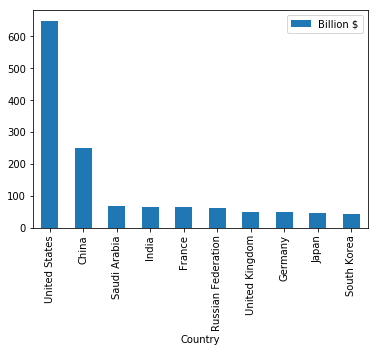

In [38]:
top10.plot(kind='bar')

### Normalize all values with the total World values as base

In [42]:
copied_country_value = Country.copy()
cols = copied_country_value.columns

for col in cols:
    copied_country_value[col] = (copied_country_value[col] / World['World'])*100

copied_country_value.head()

Year,Afghanistan,Angola,Albania,United Arab Emirates,Argentina,Armenia,Australia,Austria,Azerbaijan,Burundi,...,Uruguay,United States,Uzbekistan,Venezuela,Vietnam,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1990,NaN,0.250165,NaN,NaN,0.292987,NaN,0.957745,0.281815,NaN,0.005657,...,0.046907,43.714286,NaN,0.105410,0.073139,NaN,0.115296,0.623494,0.019903,0.059471
1991,NaN,0.150547,NaN,NaN,0.417340,NaN,1.025330,0.291103,NaN,0.006241,...,0.039216,40.875912,NaN,0.143609,0.062426,NaN,0.150105,0.565608,0.012591,0.054898
1992,NaN,0.110759,0.004402,NaN,0.453899,NaN,0.959845,0.298455,0.001544,0.005437,...,0.051181,42.538354,NaN,0.138484,0.046439,NaN,0.182273,0.512888,0.013634,0.041332
1993,NaN,0.258659,0.005727,NaN,0.491042,0.001433,0.981608,0.308326,0.011300,0.005287,...,0.061067,43.440233,NaN,0.187749,0.043399,NaN,0.223828,0.474390,0.007453,0.036414
1994,NaN,0.085610,0.007144,NaN,0.540248,NaN,1.073338,0.320512,0.006323,0.006030,...,0.064812,41.438849,0.012508,0.135206,0.062064,NaN,0.338600,0.500515,0.009046,0.035669


### Make a plot showing how the top 4 strongest firepowers have been spending on their militaries in the last 3 decades

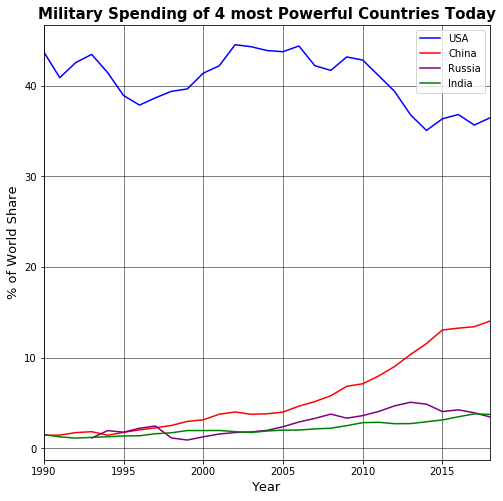

In [51]:
plt.figure(figsize=(8, 8))

USA = copied_country_value['United States']
CHN = copied_country_value['China']
RUS = copied_country_value['Russian Federation']
IND = copied_country_value['India']

USA.plot(linestyle='-', color='blue')
CHN.plot(linestyle='-', color='red')
RUS.plot(linestyle='-', color='purple')
IND.plot(linestyle='-', color='green')

plt.title('Military Spending of 4 most Powerful Countries Today', fontsize=15, fontweight='bold')
plt.xlabel('Year', fontsize=13)
plt.ylabel('% of World Share', fontsize=13)
plt.legend(['USA', 'China', 'Russia', 'India'])
plt.grid(color='grey', linestyle='-', linewidth=0.5)